# The code here is for the analysis of membership type 
- Comparing subscriber and customer in total trip count and trip count per city
- (Not This Part) Comparing subscriber and customer bike share usage on different weather at different time of the year

### ------- Reading data and creating columns --------

In [1]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format   # all results in 2 decimal points
#from ggplot import *

In [2]:
# formatting lambdas & functions
#fnone = lambda x : '{0:g}'.format(float(x))
#fshort = lambda x : '{:,.2f}'.format(x)

def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

# dictionary reference
seasons_dict = {
    1: 'Winter',2: 'Spring',3: 'Spring',4: 'Spring',
    5: 'Summer',6: 'Summer',7: 'Summer',8: 'Autumn',
    9: 'Autumn',10: 'Autumn',11: 'Winter',12: 'Winter'}

city_dict = {
    94107: 'San Francisco',
    94063: 'Redwood City',
    94301: 'Palo Alto', 
    94041: 'Mountain View', 
    95113: 'San Jose'}

# header reference
station_headers = ['station_id','station_name','lat','long',
                   'dock_count','city','install_date']

status_headers = ['station_id','bikes_free','docks_free','time']

trip_headers = ['trip_id','trip_time',
                'start_dt','start_station','start_terminal',
                'end_dt','end_station','end_terminal',
                'bike_num','user_type','ZIP']

weather_headers = ['date',
                   'max_temp','mean_temp','min_temp',
                   'max_dp','mean_dp','min_dp',
                   'max_hum','mean_hum','min_hum',
                   'max_sea','mean_sea','min_sea',
                   'max_vis','mean_vis','min_vis',
                   'max_wind','mean_wind','max_gust',
                   'rain_inches','cloud_cover','events',
                   'wind_dir_degrees','ZIP']

In [3]:
# read trip data for 2014 
raw_data_201402 = pd.read_csv('201402_trip_data.csv', parse_dates=True)
raw_data_201402.columns = trip_headers
raw_data_201408 = pd.read_csv('201408_trip_data.csv', parse_dates=True)
raw_data_201408.columns = trip_headers

In [4]:
# joining 201402 and 201408 together
raw_data_2014 = pd.concat([raw_data_201402, raw_data_201408])
# convert duration column "trip_time" to unit of minutes
raw_data_2014['trip_in_minutes'] = raw_data_2014['trip_time'] / 60   # trip time unit in minute
raw_data_2014['trip_in_hours'] = raw_data_2014['trip_in_minutes'] / 60
raw_data_2014['trip_in_days'] = raw_data_2014['trip_in_hours'] / 24
raw_data_2014 = raw_data_2014.drop(raw_data_2014[raw_data_2014.trip_in_hours > 24].index)

In [5]:
# read trip data for 2015
raw_data_2015 = pd.read_csv('201508_trip_data.csv', parse_dates=True)
raw_data_2015.columns = trip_headers
raw_data_2015['trip_in_minutes'] = raw_data_2015['trip_time'] / 60 # trip time unit in minute
raw_data_2015['trip_in_hours'] = raw_data_2015['trip_in_minutes'] / 60
raw_data_2015['trip_in_days'] = raw_data_2015['trip_in_hours'] / 24
raw_data_2015 = raw_data_2015.drop(raw_data_2015[raw_data_2015.trip_in_hours > 24].index)

## Part 1 - Membership count in total and per city

### ------------- Year 2014 ------------- 

In [6]:
raw_data_2014.head()

,trip_id,trip_time,start_dt,start_station,start_terminal,end_dt,end_station,end_terminal,bike_num,user_type,ZIP,trip_in_minutes,trip_in_hours,trip_in_days
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,1,0,0
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,1,0,0
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,1,0,0
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,1,0,0
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,1,0,0


In [7]:
raw_data_2014.describe()

,trip_id,trip_time,start_terminal,end_terminal,bike_num,trip_in_minutes,trip_in_hours,trip_in_days
count,"315,513","315,513","315,513","315,513","315,513","315,513","315,513","315,513"
mean,"217,505","1,083",57,57,433,18,0,0
std,"123,648","3,646",17,18,146,61,1,0
min,"4,069",60,2,2,9,1,0,0
25%,"109,206",347,50,50,341,6,0,0
50%,"218,181",523,61,61,444,9,0,0
75%,"323,647",776,70,70,546,13,0,0
max,"432,946","86,363",84,84,878,"1,439",24,1


In [8]:
raw_data_2014.max()

trip_id           432,946
trip_time          86,363
start_terminal         84
end_terminal           84
bike_num              878
trip_in_minutes     1,439
trip_in_hours          24
trip_in_days            1
dtype: float64

In [9]:
# create new dataframes with columns related to only trip time (duration) and user type (subscription)
duration_data_2014 = pd.DataFrame(raw_data_2014, columns=['user_type', 'trip_in_minutes','trip_in_hours'])
duration_data_2014.columns = ['membership', 'trip_in_minutes','trip_in_hours']
duration_data_2014.head()

,membership,trip_in_minutes,trip_in_hours
0,Subscriber,1,0
1,Subscriber,1,0
2,Subscriber,1,0
3,Subscriber,1,0
4,Subscriber,1,0


In [10]:
table01 = duration_data_2014[['membership','trip_in_hours']]
table01['user'] = ''
table01_over = table01[table01['trip_in_hours'] > 24]
table01_less = table01[table01['trip_in_hours'] < 24]
#table01 = pd.DataFrame(duration_data_2014, columns=['membership','trip_in_hours'])
#table01 = duration_data_2014[duration_data_2014['trip_in_hours'] > 24]

d_less = duration_data_2014[duration_data_2014['trip_in_hours'] < 24]
#duration_data_2014.columns = ['membership', 'trip_in_minutes','trip_in_hours']
#duration_data_2014.columns = ['membership', 'trip_in_minutes','trip_in_hours']


#d1 = duration_data_2014[duration_data_2014['trip_in_hours']>24]
dd1 = table01_over.groupby(['user']).describe()
dd2 = table01_less.groupby(['user']).describe()

##  df_new = pd.concat([df_a, df_b])
time_table1 = pd.concat([dd1, dd2],axis=1)
#time_table1.columns = ['trips > 24 hrs','trips < 24 hrs']
#time_table1
#time_table1.columns = ['trips > 24 hrs','trips < 24 hrs']
time_table1

trip_in_hours
user                     
     count        315,513
     mean               0
     std                1
     min                0
     25%                0
     50%                0
     75%                0
     max               24

In [11]:
duration_data_2014b = raw_data_2014[['user_type','trip_in_minutes']]
duration_data_2014b.describe()

,trip_in_minutes
count,"315,513"
mean,18
std,61
min,1
25%,6
50%,9
75%,13
max,"1,439"


## Total Count and membership in total

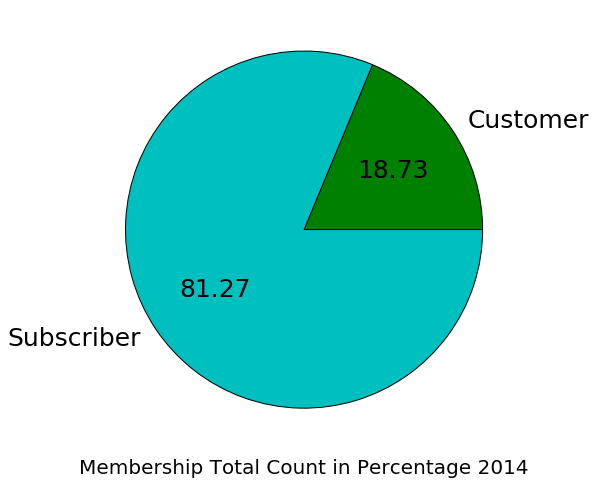

In [12]:
# membership count (same as trip count) counts in total
membership_2014 = duration_data_2014.groupby('membership')
count_2014 = membership_2014.count()['trip_in_minutes']
count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Membership Total Count in Percentage 2014', fontsize=20)

In [13]:
# statistics table for total customer and subscribers in 2014
membership_2014.describe()

trip_in_hours  trip_in_minutes
membership                                      
Customer   count         59,111           59,111
           mean               1               55
           std                2              126
           min                0                1
           25%                0               11
           50%                0               18
           75%                1               37
           max               24            1,439
Subscriber count        256,402          256,402
           mean               0                9
           std                0               22
           min                0                1
           25%                0                5
           50%                0                8
           75%                0               11
           max               24            1,422

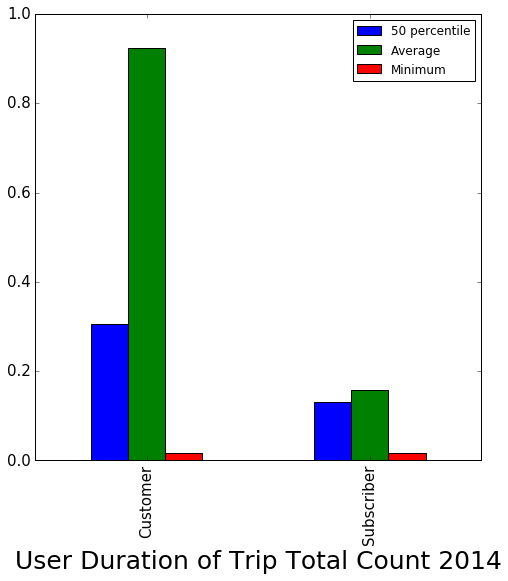

In [14]:
# make a new table with min, max, mean for both membership
mean_2014 = membership_2014.mean()['trip_in_minutes'] / 60  # unit in hour
min_2014 = membership_2014.min()['trip_in_minutes'] / 60 # unit in hour  
mid_2014 = membership_2014.quantile(0.5)['trip_in_minutes'] / 60  # unit in hour
#max_2014 = membership_2014.max()['trip_in_minutes'] / 60 # unit in hour ---> too big

member_time_2014 = pd.DataFrame({'Average': mean_2014, '50 percentile': mid_2014, 'Minimum': min_2014})
member_time_2014.plot.bar(figsize=(8,8),fontsize=15)
plt.xlabel('User Duration of Trip Total Count 2014', fontsize=25)

## Trip Count and membershio info per city (SF, RC, PA, SJ, MV)

In [15]:
# STATION_DATA
# read station data, grou
raw_data_1 = pd.read_csv('201402_station_data.csv')
raw_data_1.columns = station_headers
raw_data_2 = pd.read_csv('201408_station_data.csv')
raw_data_2.columns = station_headers
raw_data_3 = pd.read_csv('201508_station_data.csv') # current dataset
raw_data_3.columns = station_headers

# merged station datasets
station_data = pd.concat([raw_data_1, raw_data_2, raw_data_3])
station_data.head()

,station_id,station_name,lat,long,dock_count,city,install_date
0,2,San Jose Diridon Caltrain Station,37,-122,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37,-122,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37,-122,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37,-122,19,San Jose,8/5/2013
4,6,San Pedro Square,37,-122,15,San Jose,8/7/2013


In [16]:
# sort station ID by city
san_jose_station_id = list(set(station_data[station_data['city']=='San Jose']['station_id']))
san_francisco_station_id = list(set(station_data[station_data['city']=='San Francisco']['station_id']))
redwood_city_station_id = list(set(station_data[station_data['city']=='Redwood City']['station_id']))
palo_alto_station_id = list(set(station_data[station_data['city']=='Palo Alto']['station_id']))
mountain_view_station_id = list(set(station_data[station_data['city']=='Mountain View']['station_id']))

In [17]:
# filter raw trip data 2014 according to station ID
sf_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(palo_alto_station_id)]
sj_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(san_jose_station_id)]
rc_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(redwood_city_station_id)]
pa_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(palo_alto_station_id)]
mv_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(mountain_view_station_id)]

### San Francisco Trip Count and Membership info

In [18]:
sf_trip_data_2014 = pd.DataFrame(sf_trip_data_2014, columns=['user_type', 'trip_in_minutes'])
sf_trip_data_2014.columns = ['membership', 'trip_in_minutes']  
sf_trip_data_2014.head()

,membership,trip_in_minutes
45,Subscriber,3
87,Customer,5
96,Subscriber,5
101,Subscriber,5
115,Subscriber,5


In [19]:
# SF trip data statistics for both user type
sf_trip_data_2014.describe()

,trip_in_minutes
count,"3,679"
mean,55
std,147
min,1
25%,6
50%,16
75%,42
max,"1,431"


In [20]:
# SF trip data for each user type
sf_trip_data_membership_2014 = sf_trip_data_2014.groupby('membership')
sf_trip_data_membership_2014.describe()

trip_in_minutes
membership                       
Customer   count            1,710
           mean               103
           std                201
           min                  1
           25%                 20
           50%                 47
           75%                 97
           max              1,431
Subscriber count            1,969
           mean                13
           std                 37
           min                  1
           25%                  4
           50%                  9
           75%                 15
           max                943

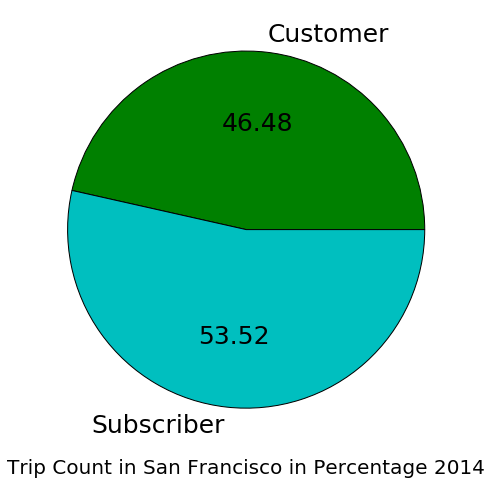

In [21]:
# membership count (same as trip count) counts in San Francisco
sf_trip_data_membership_2014 = sf_trip_data_2014.groupby('membership')
sf_count_2014 = sf_trip_data_membership_2014.count()['trip_in_minutes']
sf_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Francisco in Percentage 2014', fontsize=20)

### San Jose Trip Count and Membership info

In [22]:
sj_trip_data_2014 = pd.DataFrame(sj_trip_data_2014, columns=['user_type', 'trip_in_minutes'])
sj_trip_data_2014.columns = ['membership', 'trip_in_minutes']  
sj_trip_data_2014.head()

,membership,trip_in_minutes
1,Subscriber,1
3,Subscriber,1
6,Subscriber,2
7,Subscriber,2
9,Subscriber,2


In [23]:
# SJ trip data statistics for both user type
sj_trip_data_2014.describe()

,trip_in_minutes
count,"19,892"
mean,19
std,80
min,1
25%,5
50%,8
75%,12
max,"1,434"


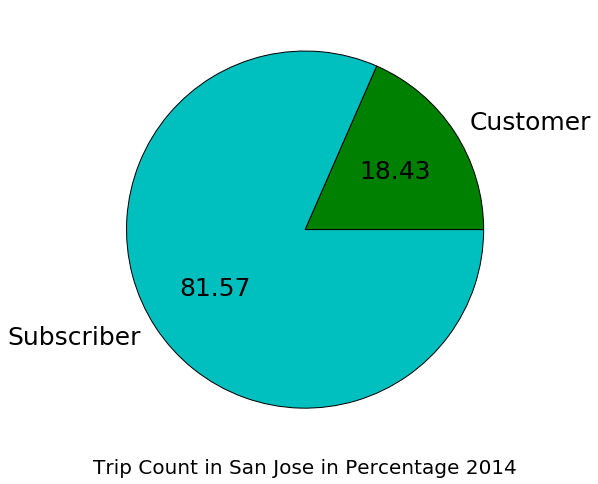

In [24]:
# membership count (same as trip count) counts in San Jose
sj_trip_data_membership_2014 = sj_trip_data_2014.groupby('membership')
sj_count_2014 = sj_trip_data_membership_2014.count()['trip_in_minutes']
sj_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Jose in Percentage 2014', fontsize=20)

In [25]:
# SJ trip data for each user type
sj_trip_data_membership_2014.describe()

trip_in_minutes
membership                       
Customer   count            3,667
           mean                63
           std                169
           min                  1
           25%                 10
           50%                 18
           75%                 43
           max              1,434
Subscriber count           16,225
           mean                 9
           std                 30
           min                  1
           25%                  5
           50%                  7
           75%                 10
           max              1,407

### Palo Alto Trip Count and Membership info

In [26]:
pa_trip_data_2014 = pd.DataFrame(pa_trip_data_2014, columns=['user_type', 'trip_in_minutes'])
pa_trip_data_2014.columns = ['membership', 'trip_in_minutes']  
pa_trip_data_2014.head()

,membership,trip_in_minutes
45,Subscriber,3
87,Customer,5
96,Subscriber,5
101,Subscriber,5
115,Subscriber,5


In [27]:
# PA trip data statistics for both user type
pa_trip_data_2014.describe()

,trip_in_minutes
count,"3,679"
mean,55
std,147
min,1
25%,6
50%,16
75%,42
max,"1,431"


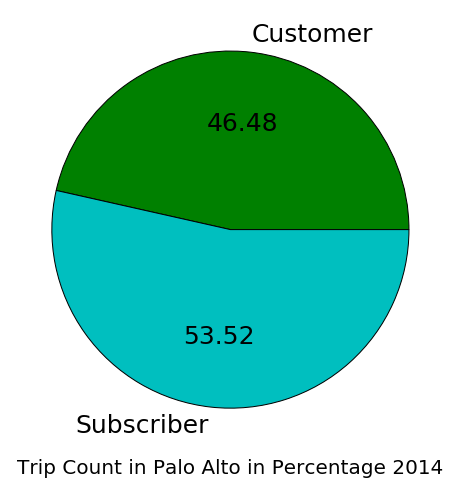

In [28]:
# membership count (same as trip count) counts in Palo Alto
pa_trip_data_membership_2014 = pa_trip_data_2014.groupby('membership')
pa_count_2014 = pa_trip_data_membership_2014.count()['trip_in_minutes']
pa_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Palo Alto in Percentage 2014', fontsize=20)

In [29]:
# PA trip data for each user type
pa_trip_data_membership_2014.describe()

trip_in_minutes
membership                       
Customer   count            1,710
           mean               103
           std                201
           min                  1
           25%                 20
           50%                 47
           75%                 97
           max              1,431
Subscriber count            1,969
           mean                13
           std                 37
           min                  1
           25%                  4
           50%                  9
           75%                 15
           max                943

### Redwood CIty Trip Count and Membership info

In [30]:
rc_trip_data_2014 = pd.DataFrame(rc_trip_data_2014, columns=['user_type', 'trip_in_minutes'])
rc_trip_data_2014.columns = ['membership', 'trip_in_minutes']  
rc_trip_data_2014.head()

,membership,trip_in_minutes
21,Subscriber,2
29,Subscriber,3
105,Subscriber,5
133,Subscriber,6
392,Subscriber,13


In [31]:
# RC trip data statistics for both user type
rc_trip_data_2014.describe()

,trip_in_minutes
count,"1,408"
mean,35
std,142
min,1
25%,4
50%,5
75%,9
max,"1,421"


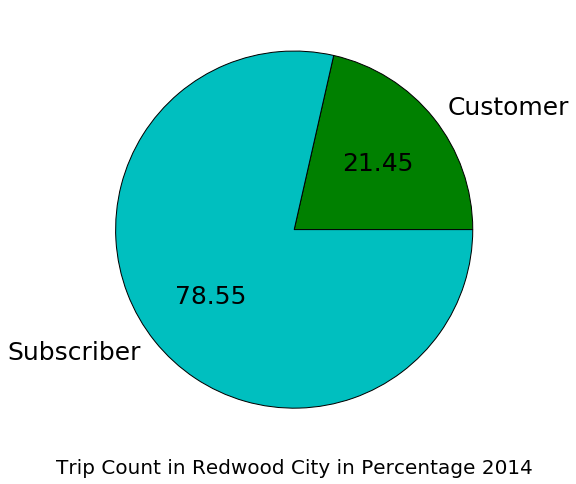

In [32]:
# membership count (same as trip count) counts in Redwood City
rc_trip_data_membership_2014 = rc_trip_data_2014.groupby('membership')
rc_count_2014 = rc_trip_data_membership_2014.count()['trip_in_minutes']
rc_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Redwood City in Percentage 2014', fontsize=20)

In [33]:
# RC trip data for each user type
rc_trip_data_membership_2014.describe()

trip_in_minutes
membership                       
Customer   count              302
           mean               140
           std                282
           min                  1
           25%                  9
           50%                 26
           75%                116
           max              1,421
Subscriber count            1,106
           mean                 6
           std                 13
           min                  1
           25%                  4
           50%                  4
           75%                  6
           max                296

### Mountain View Trip Count and Membership info

In [34]:
mv_trip_data_2014 = pd.DataFrame(mv_trip_data_2014, columns=['user_type', 'trip_in_minutes'])
mv_trip_data_2014.columns = ['membership', 'trip_in_minutes']  
mv_trip_data_2014.head()

,membership,trip_in_minutes
2,Subscriber,1
12,Subscriber,2
55,Subscriber,4
83,Customer,4
91,Customer,5


In [35]:
# MV trip data statistics for both user type
mv_trip_data_2014.describe()

,trip_in_minutes
count,"8,139"
mean,26
std,112
min,1
25%,4
50%,5
75%,10
max,"1,439"


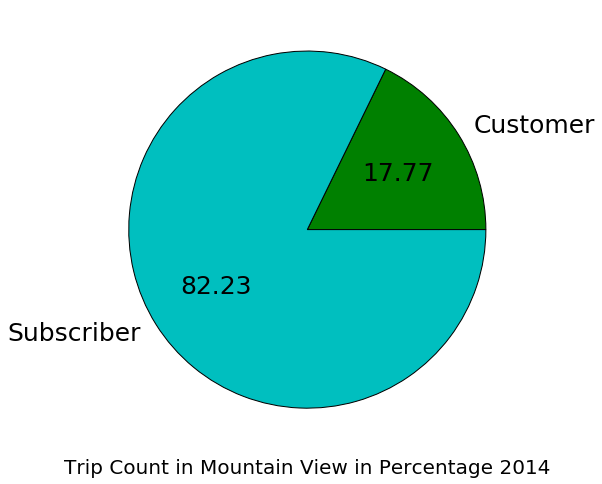

In [36]:
# membership count (same as trip count) counts in Mountain View
mv_trip_data_membership_2014 = mv_trip_data_2014.groupby('membership')
mv_count_2014 = mv_trip_data_membership_2014.count()['trip_in_minutes']
mv_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Mountain View in Percentage 2014', fontsize=20)

In [37]:
# MV trip data for each user type
mv_trip_data_membership_2014.describe()

trip_in_minutes
membership                       
Customer   count            1,446
           mean               113
           std                240
           min                  1
           25%                 13
           50%                 27
           75%                 90
           max              1,439
Subscriber count            6,693
           mean                 7
           std                 28
           min                  1
           25%                  4
           50%                  5
           75%                  6
           max              1,289

### ------------- Year 2015 ------------- 

In [38]:


raw_data_2015['trip_in_minutes'] = raw_data_2015['trip_time'] / 60   # trip time unit in minute
raw_data_2015['trip_in_hours'] = raw_data_2015['trip_in_minutes'] / 60
raw_data_2015['trip_in_days'] = raw_data_2015['trip_in_hours'] / 24
raw_data_2015.head()

,trip_id,trip_time,start_dt,start_station,start_terminal,end_dt,end_station,end_terminal,bike_num,user_type,ZIP,trip_in_minutes,trip_in_hours,trip_in_days
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,13,0,0
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,17,0,0
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,5,0,0
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,7,0,0
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069,13,0,0


In [39]:
# create new dataframes with columns related to only trip time (duration) and user type (subscription)


duration_data_2015 = pd.DataFrame(raw_data_2015, columns=['user_type', 'trip_in_minutes'])
duration_data_2015.columns = ['membership', 'trip_in_minutes']  
duration_data_2015.head()

,membership,trip_in_minutes
0,Subscriber,13
1,Subscriber,17
2,Subscriber,5
3,Subscriber,7
4,Customer,13


## Total Count and member in total

In [40]:
# duration description in total --> notice count increases 
duration_data_2015.describe()

,trip_in_minutes
count,"354,011"
mean,15
std,48
min,1
25%,6
50%,9
75%,12
max,"1,440"


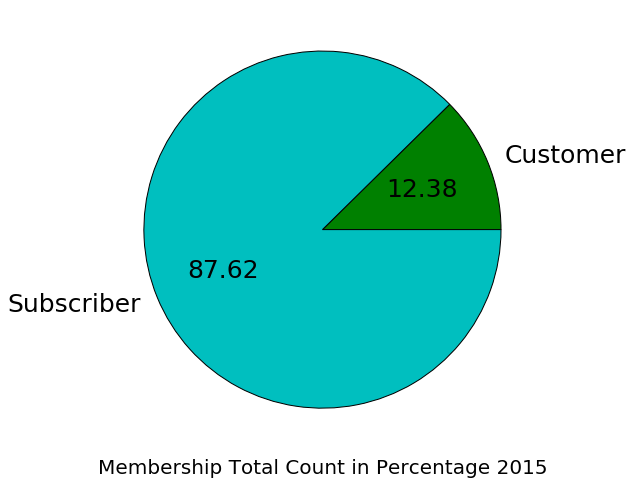

In [41]:
# membership count (same as trip count) counts in total
membership_2015 = duration_data_2015.groupby('membership')
count_2015 = membership_2015.count()['trip_in_minutes']
count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Membership Total Count in Percentage 2015', fontsize=20)

In [42]:
# statistics table for total customer and subscribers in 2015
membership_2015.describe()

trip_in_minutes
membership                       
Customer   count           43,821
           mean                53
           std                115
           min                  1
           25%                 11
           50%                 19
           75%                 40
           max              1,440
Subscriber count          310,190
           mean                10
           std                 23
           min                  1
           25%                  5
           50%                  8
           75%                 11
           max              1,428

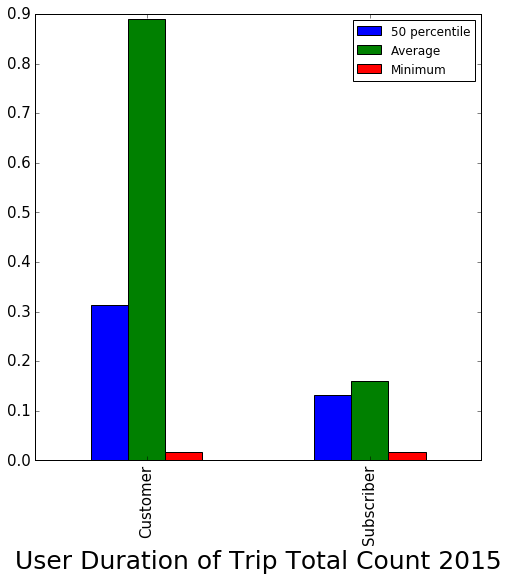

In [43]:
# make a new table with min, max, mean for both membership
mean_2015 = membership_2015.mean()['trip_in_minutes'] / 60  # unit in hour
min_2015 = membership_2015.min()['trip_in_minutes'] / 60 # unit in hour  
mid_2015 = membership_2015.quantile(0.5)['trip_in_minutes'] / 60  # unit in hour
#max_2015 = membership_2015.max()['trip_duration'] / 60 # unit in hour ---> too big

member_time_2015 = pd.DataFrame({'Average': mean_2015, '50 percentile': mid_2015, 'Minimum': min_2015})
member_time_2015.plot.bar(figsize=(8,8),fontsize=15)
plt.xlabel('User Duration of Trip Total Count 2015', fontsize=25)

## Trip Count and membership info per city (SF, RC, PA, SJ, MV)

In [44]:
# filter raw trip data 2015 according to station ID
sf_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(palo_alto_station_id)]
sj_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(san_jose_station_id)]
rc_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(redwood_city_station_id)]
pa_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(palo_alto_station_id)]
mv_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(mountain_view_station_id)]

### San Francisco Trip Count and Membership info

In [45]:
sf_trip_data_2015 = pd.DataFrame(sf_trip_data_2015, columns=['user_type', 'trip_in_minutes'])
sf_trip_data_2015.columns = ['membership', 'trip_in_minutes']  
sf_trip_data_2015.head()

,membership,trip_in_minutes
16,Customer,2
110,Subscriber,19
121,Subscriber,4
246,Subscriber,4
266,Subscriber,4


In [46]:
# SF trip data statistics for both user type
sf_trip_data_2015.describe()

,trip_in_minutes
count,"3,054"
mean,45
std,133
min,1
25%,5
50%,14
75%,32
max,"1,428"


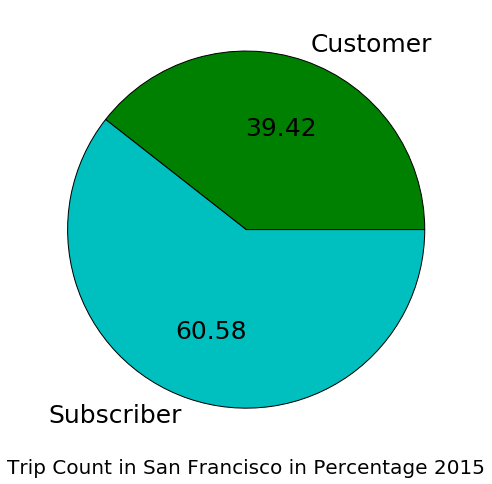

In [47]:
# membership count (same as trip count) counts in San Francisco
sf_trip_data_membership_2015 = sf_trip_data_2015.groupby('membership')
sf_count_2015 = sf_trip_data_membership_2015.count()['trip_in_minutes']
sf_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Francisco in Percentage 2015', fontsize=20)

In [48]:
# SF trip data for each user type
sf_trip_data_membership_2015.describe()

trip_in_minutes
membership                       
Customer   count            1,204
           mean                93
           std                192
           min                  1
           25%                 21
           50%                 44
           75%                 88
           max              1,421
Subscriber count            1,850
           mean                14
           std                 52
           min                  1
           25%                  4
           50%                 10
           75%                 14
           max              1,428

### San Jose Trip Count and Membership info

In [49]:
sj_trip_data_2015 = pd.DataFrame(sj_trip_data_2015, columns=['user_type', 'trip_in_minutes'])
sj_trip_data_2015.columns = ['membership', 'trip_in_minutes']  
sj_trip_data_2015.head()

,membership,trip_in_minutes
3,Subscriber,7
151,Subscriber,12
157,Subscriber,13
158,Subscriber,9
170,Subscriber,7


In [50]:
# SJ trip data statistics for both user type
sj_trip_data_2015.describe()

,trip_in_minutes
count,"17,920"
mean,15
std,56
min,1
25%,5
50%,8
75%,11
max,"1,388"


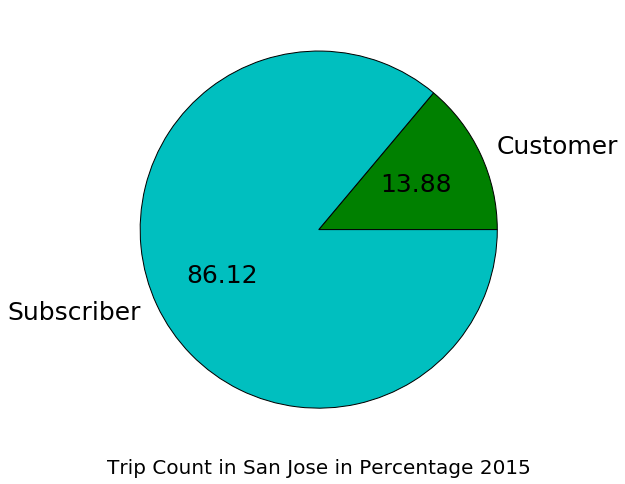

In [51]:
# membership count (same as trip count) counts in San Jose
sj_trip_data_membership_2015 = sj_trip_data_2015.groupby('membership')
sj_count_2015 = sj_trip_data_membership_2015.count()['trip_in_minutes']
sj_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Jose in Percentage 2015', fontsize=20)

In [52]:
# SJ trip data for each user type
sj_trip_data_membership_2015.describe()

trip_in_minutes
membership                       
Customer   count            2,488
           mean                53
           std                129
           min                  1
           25%                 10
           50%                 20
           75%                 43
           max              1,388
Subscriber count           15,432
           mean                 9
           std                 27
           min                  1
           25%                  5
           50%                  7
           75%                 10
           max              1,317

### Palo Alto Trip Count and Membership info

In [53]:
pa_trip_data_2015 = pd.DataFrame(pa_trip_data_2015, columns=['user_type', 'trip_in_minutes'])
pa_trip_data_2015.columns = ['membership', 'trip_in_minutes']  
pa_trip_data_2015.head()

,membership,trip_in_minutes
16,Customer,2
110,Subscriber,19
121,Subscriber,4
246,Subscriber,4
266,Subscriber,4


In [54]:
# PA trip data statistics for both user type
pa_trip_data_2015.describe()

,trip_in_minutes
count,"3,054"
mean,45
std,133
min,1
25%,5
50%,14
75%,32
max,"1,428"


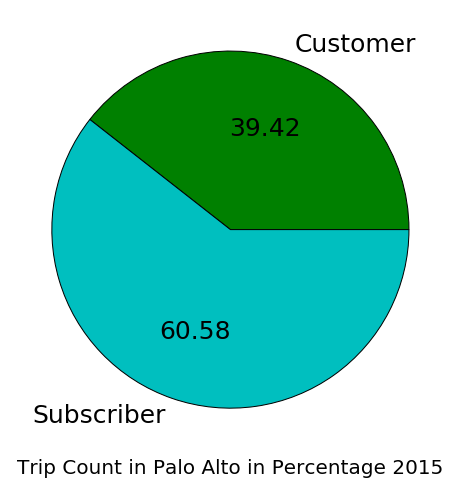

In [55]:
# membership count (same as trip count) counts in Palo Alto
pa_trip_data_membership_2015 = pa_trip_data_2015.groupby('membership')
pa_count_2015 = pa_trip_data_membership_2015.count()['trip_in_minutes']
pa_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Palo Alto in Percentage 2015', fontsize=20)

In [56]:
# PA trip data for each user type
pa_trip_data_membership_2015.describe()

trip_in_minutes
membership                       
Customer   count            1,204
           mean                93
           std                192
           min                  1
           25%                 21
           50%                 44
           75%                 88
           max              1,421
Subscriber count            1,850
           mean                14
           std                 52
           min                  1
           25%                  4
           50%                 10
           75%                 14
           max              1,428

### Redwood CIty Trip Count and Membership info

In [57]:
rc_trip_data_2015 = pd.DataFrame(rc_trip_data_2015, columns=['user_type', 'trip_in_minutes'])
rc_trip_data_2015.columns = ['membership', 'trip_in_minutes']  
rc_trip_data_2015.head()

,membership,trip_in_minutes
115,Subscriber,4
134,Subscriber,4
217,Subscriber,8
419,Subscriber,12
517,Subscriber,24


In [58]:
# RC trip data statistics for both user type
rc_trip_data_2015.describe()

,trip_in_minutes
count,"2,013"
mean,24
std,93
min,1
25%,5
50%,10
75%,14
max,"1,437"


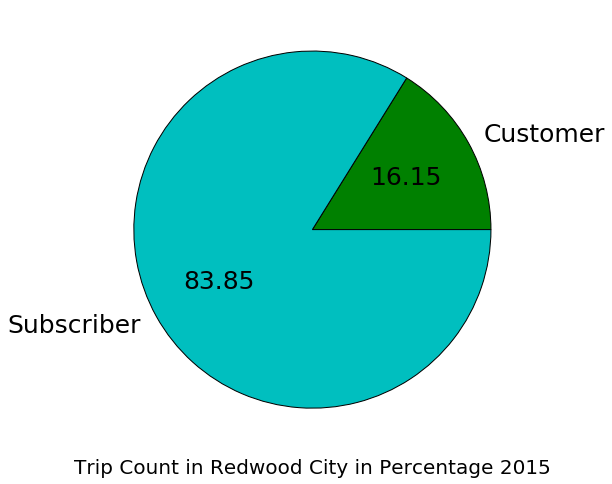

In [59]:
# membership count (same as trip count) counts in Redwood City
rc_trip_data_membership_2015 = rc_trip_data_2015.groupby('membership')
rc_count_2015 = rc_trip_data_membership_2015.count()['trip_in_minutes']
rc_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Redwood City in Percentage 2015', fontsize=20)

In [60]:
# RC trip data for each user type
rc_trip_data_membership_2015.describe()

trip_in_minutes
membership                       
Customer   count              325
           mean                89
           std                208
           min                  1
           25%                 13
           50%                 22
           75%                 67
           max              1,437
Subscriber count            1,688
           mean                11
           std                 31
           min                  1
           25%                  4
           50%                  8
           75%                 13
           max              1,052

### Mountain View Trip Count and Membership info

In [61]:
mv_trip_data_2015 = pd.DataFrame(mv_trip_data_2015, columns=['user_type', 'trip_in_minutes'])
mv_trip_data_2015.columns = ['membership', 'trip_in_minutes']  
mv_trip_data_2015.head()

,membership,trip_in_minutes
1,Subscriber,17
21,Subscriber,6
32,Subscriber,5
69,Subscriber,15
124,Subscriber,5


In [62]:
# MV trip data statistics for both user type
mv_trip_data_2015.describe()

,trip_in_minutes
count,"9,989"
mean,18
std,82
min,1
25%,4
50%,5
75%,8
max,"1,440"


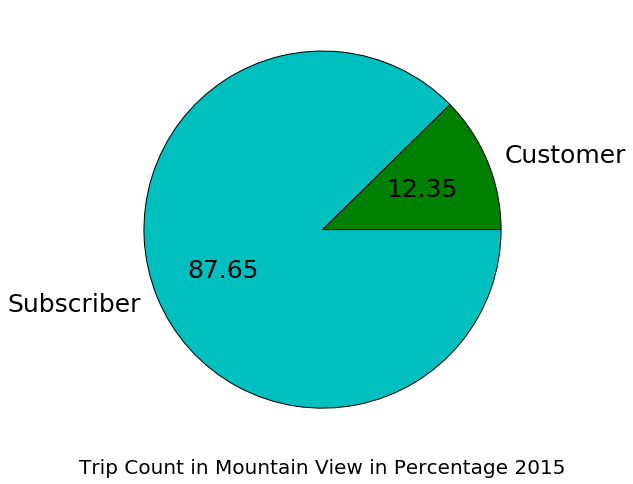

In [63]:
# membership count (same as trip count) counts in Mountain View
mv_trip_data_membership_2015 = mv_trip_data_2015.groupby('membership')
mv_count_2015 = mv_trip_data_membership_2015.count()['trip_in_minutes']
mv_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Mountain View in Percentage 2015', fontsize=20)

In [64]:
# RC trip data for each user type
mv_trip_data_membership_2015.describe()

trip_in_minutes
membership                       
Customer   count            1,234
           mean                93
           std                209
           min                  1
           25%                 13
           50%                 25
           75%                 82
           max              1,440
Subscriber count            8,755
           mean                 7
           std                 24
           min                  1
           25%                  4
           50%                  5
           75%                  6
           max                871

In [65]:
# number of trips for each membership compared with weather (part 3)
# count trip id
# weather for each month and each season